In [1]:
import comparer_300_events as comparer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
# Load the ground truth annotated data
validation_file_path = "/raid/chanjuanmeng/IMPACTDB/data/300_events/300_events_annotation.xlsx"
validation_table = pd.read_excel(validation_file_path, dtype="str")
validation_table.rename(columns={'Total_Damage ': 'Total_Damage'}, inplace=True)
validation_table.replace('\xa0', '', regex=True, inplace=True)
validation_table.replace({np.nan: None}, inplace=True)
validation_table.replace({'NULL ': None}, inplace=True)
validation_table.replace({'NULL': None}, inplace=True)

integer_columns = ["Total_Deaths",
                   "Num_Injured",
                   "Displaced_People",
                   "Num_Homeless",
                   "Total_Affected",
                   "Insured_Damage",
                   "Insured_Damage_Inflation_Adjusted_Year",
                   "Total_Damage",
                   "Total_Damage_Inflation_Adjusted_Year",
                   "Buildings_Damaged"]
for column in integer_columns:
    validation_table[column] = validation_table[column].str.replace('[^0-9]', '', regex=True)

validation_table.replace({'NULL': None}, inplace=True)
validation_table.replace({'': None}, inplace=True)

# validation_table.columns

In [3]:
# Load results from mistral
mistral_file_path = "/raid/chanjuanmeng/IMPACTDB/results/output_to_csv/Mistral/02191252-Mistral_300_FullText_with_id.csv"
mistral_table = pd.read_csv(mistral_file_path, dtype="str", encoding="ISO-8859-1")
mistral_table.rename(columns={'Total_Damage ': 'Total_Damage'}, inplace=True)
mistral_table.rename(columns={'Total_Death': 'Total_Deaths'}, inplace=True)
mistral_table.rename(columns={'Num_Displaced': 'Displaced_People'}, inplace=True)
mistral_table.rename(columns={'Num_Affected': 'Total_Affected'}, inplace=True)
mistral_table.replace('\xa0', '', regex=True, inplace=True)
mistral_table.replace({np.nan: None}, inplace=True)

integer_columns = ["Total_Deaths",
                   "Num_Injured",
                   "Displaced_People",
                   "Num_Homeless",
                   "Total_Affected",
                   "Insured_Damage",
                   "Insured_Damage_Inflation_Adjusted_Year",
                   "Total_Damage",
                   "Total_Damage_Inflation_Adjusted_Year",
                   "Buildings_Damaged"]
for column in integer_columns:
    mistral_table[column] = mistral_table[column].str.replace('[^0-9]', '', regex=True)

mistral_table.replace({np.nan: None}, inplace=True)
mistral_table.replace({'NULL ': None}, inplace=True)
mistral_table.replace({'NULL': None}, inplace=True)
mistral_table.replace({'': None}, inplace=True)

# mistral_table.columns
# mistral_table.loc[11]['Insured_Damage']

In [ ]:
# mistral_table.loc[7]['Location'].replace(", ", "|")

In [4]:
# Load results from Llama2
llama2_file_path = "/raid/chanjuanmeng/IMPACTDB/results/output_to_csv/Llama2/02191338-Llama2_300_FullText_with_id.csv"
llama2_table = pd.read_csv(llama2_file_path, dtype="str", encoding="ISO-8859-1")
llama2_table.rename(columns={'Total_Damage ': 'Total_Damage'}, inplace=True)
llama2_table.rename(columns={'Total_Death': 'Total_Deaths'}, inplace=True)
llama2_table.rename(columns={'Num_Displaced': 'Displaced_People'}, inplace=True)
llama2_table.rename(columns={'Num_Affected': 'Total_Affected'}, inplace=True)
llama2_table.replace('\xa0', '', regex=True, inplace=True)
llama2_table.replace({np.nan: None}, inplace=True)

integer_columns = ["Total_Deaths",
                   "Num_Injured",
                   "Displaced_People",
                   "Num_Homeless",
                   "Total_Affected",
                   "Insured_Damage",
                   "Insured_Damage_Inflation_Adjusted_Year",
                   "Total_Damage",
                   "Total_Damage_Inflation_Adjusted_Year",
                   "Buildings_Damaged"]
for column in integer_columns:
    llama2_table[column] = llama2_table[column].str.replace('[^0-9]', '', regex=True)

llama2_table.replace({np.nan: None}, inplace=True)
llama2_table.replace({'NULL ': None}, inplace=True)
llama2_table.replace({'NULL': None}, inplace=True)
llama2_table.replace({'': None}, inplace=True)

# llama2_table.columns

In [5]:
def compare_between_matched_tables(table_1, table_2, weights, null_penalty=1, index_range=None):
    
    comp = comparer.Comparer(null_penalty=null_penalty)
    weighted_comparisons = []
    all_comparisons = []
    precision = []
    # recall = []
   
    if index_range == None:
        index_range = range(len(table_1))

    for idx in index_range:
        event_1 = table_1.loc[idx]
        event_2 = table_2.loc[idx]

        weighted_comparison = comp.weighted(event_1.to_dict(), event_2.to_dict(), weights)
        all_comparison = comp.all(event_1.to_dict(), event_2.to_dict())
        p, r = comp.events([event_1], [event_2], weights)

        weighted_comparisons.append(weighted_comparison)
        all_comparisons.append(all_comparison)
        precision.append(p)
        # recall.append(r)


    comparison_df_weighted = pd.DataFrame(weighted_comparisons)
    comparison_df_all = pd.DataFrame(all_comparisons)

    return comparison_df_weighted, comparison_df_all, precision

In [6]:
weights = {
    #  "Event_Type": 0,
    #  "Event_Name": 0,
    "Insured_Damage_Units": 1,
    "Total_Damage_Units": 1,
    "Location": 1,
    "Single_Date": 0,
    "Start_Date": 0.5,
    "End_Date": 0.5,
    "Total_Deaths": 1,
    "Num_Injured": 1,
    "Displaced_People": 1,
    "Num_Homeless": 1,
    "Total_Affected": 1,
    "Insured_Damage": 1,
    "Insured_Damage_Inflation_Adjusted_Year": 0,
    "Total_Damage": 1,
    "Total_Damage_Inflation_Adjusted_Year": 0,
    "Buildings_Damaged": 1,
    "Insured_Damage_Inflation_Adjusted": 0,
    "Total_Damage_Inflation_Adjusted": 0}

In [7]:
comparison_df_weighted = {}
comparison_df_all = {}
precision = {}

comparison_df_weighted["llama2_vs_validation"], comparison_df_all["llama2_vs_validation"], precision["llama2_vs_validation"] = compare_between_matched_tables(
    validation_table, llama2_table, weights, index_range=range(50))
comparison_df_weighted["mistral_vs_validation"], comparison_df_all["mistral_vs_validation"], precision["mistral_vs_validation"] = compare_between_matched_tables(
    validation_table, mistral_table, weights, index_range=range(50))

comparison_df_all["llama2_vs_validation"].to_csv('./results/Llama2_50_events_full_comparison.csv', index=True)
comparison_df_all["mistral_vs_validation"].to_csv('./results/Mistral_50_events_full_comparison.csv', index=True)

In [8]:
mistral_color = '#ffa102'
meta_color = '#0866ff'

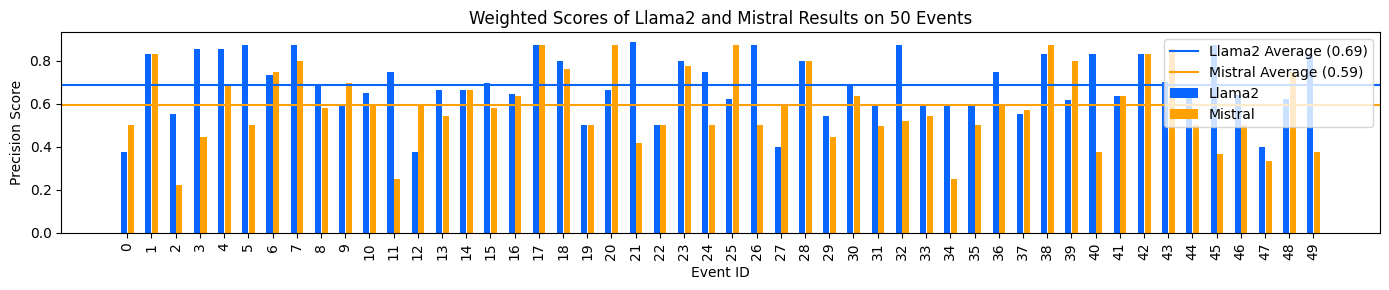

In [18]:
average_precision_1 = np.mean(precision['llama2_vs_validation'])
average_precision_2 = np.mean(precision['mistral_vs_validation'])


plt.figure(figsize=(14, 3))

# Width of the bars and positions
bar_width = 0.25
index = np.arange(len(precision['llama2_vs_validation']))


plt.bar(index, precision['llama2_vs_validation'], width=bar_width, color=meta_color, label='Llama2')


plt.bar(index + 1.1*bar_width, precision['mistral_vs_validation'],
        width=bar_width, color=mistral_color, label='Mistral')

# Marking the averages
plt.axhline(y=average_precision_1, color=meta_color, linestyle='-', label=f'Llama2 Average ({average_precision_1:.2f})')
plt.axhline(y=average_precision_2, color=mistral_color, linestyle='-',
            label=f'Mistral Average ({average_precision_2:.2f})')


plt.title('Weighted Scores of Llama2 and Mistral Results on 50 Events')
plt.xlabel('Event ID')
plt.ylabel('Precision Score')
plt.legend()

# Improve the x-axis ticks to handle such a large number of bars
plt.xticks(index + bar_width / 2, range(len(precision['llama2_vs_validation'])), rotation=90)

plt.tight_layout()
plt.savefig('./results/Weighted Scores of Llama2 and Mistral Results on 50 Events.svg', format='svg', bbox_inches='tight')
plt.show()

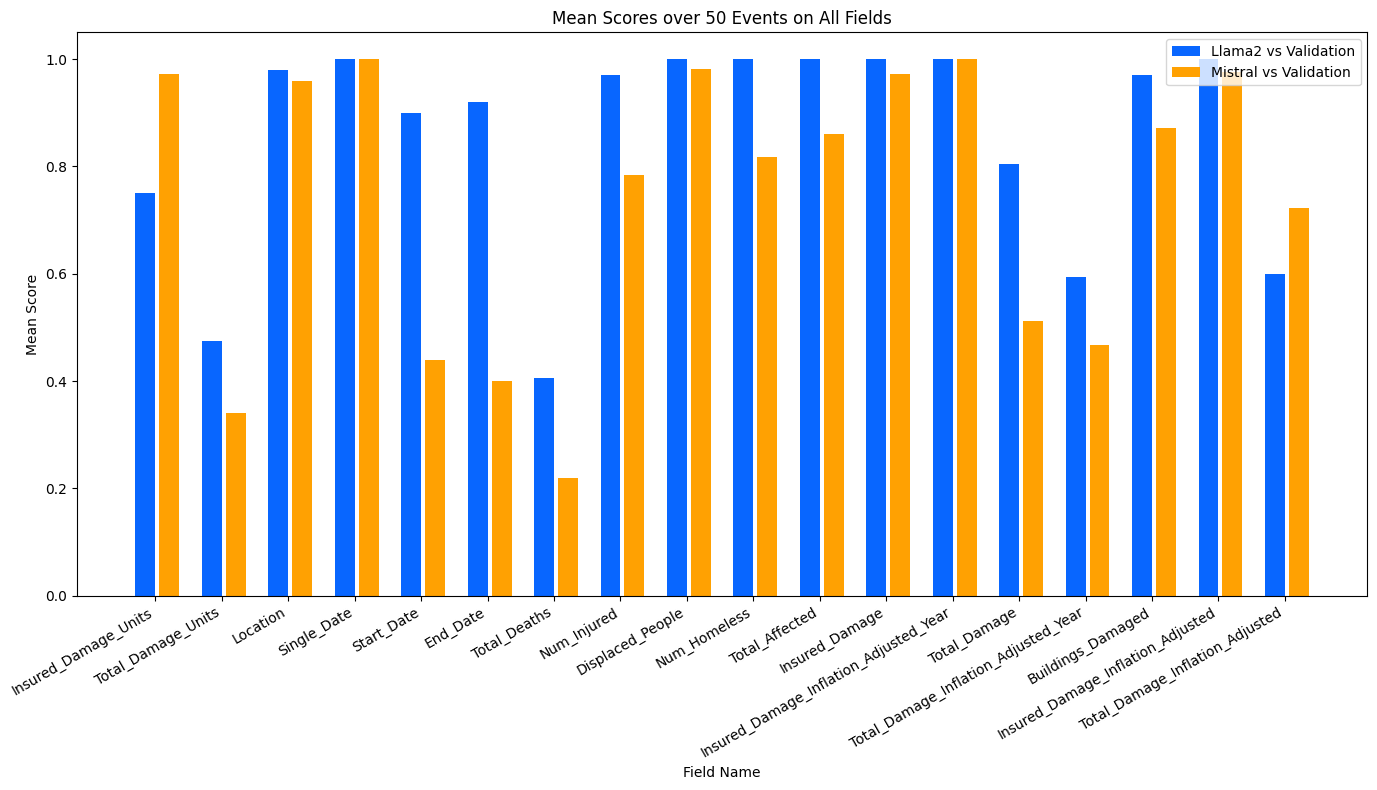

In [11]:
df1 = comparison_df_all['llama2_vs_validation']
df2 = comparison_df_all['mistral_vs_validation']

# Calculate mean scores for each column in both dataframes
mean_scores_df1 = df1.mean()
mean_scores_df2 = df2.mean()

plt.figure(figsize=(14, 8))

# Define the position of bars on the x-axis
bar_width = 0.3
index = np.arange(len(mean_scores_df1))


plt.bar(index, mean_scores_df1, width=bar_width, color=meta_color, label='Llama2 vs Validation')
plt.bar(index + 1.2*bar_width, mean_scores_df2, width=bar_width, color=mistral_color, label='Mistral vs Validation')


plt.title('Mean Scores over 50 Events on All Fields')
plt.xlabel('Field Name')
plt.ylabel('Mean Score')
plt.legend()

# Adding x-axis labels (column names) with rotation
plt.xticks(index + bar_width / 2, mean_scores_df1.index, rotation=30, ha='right')

plt.tight_layout()
plt.savefig('./results/Mean Scores over 50 Events on All Fields.svg', format='svg', bbox_inches='tight')
plt.show()